In [1]:
from sympy import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np

In [4]:
from scipy import *

### Функция одной переменной

In [6]:
y, x, lam = symbols('y x lam')

In [7]:
y = 3 * x ** 2
df = diff(y, x)

In [8]:
x_0 = 0
res = {'x': [], 'y': []}
x_1 = 5

In [11]:
while abs(x_0 - x_1) > 0.00000001:
    x_0 = x_1
    res['x'].append(x_0)
    res['y'].append(y.subs(x, x_0))
    f = y.subs(x, x_0 - lam * df.subs(x, x_0))
    d = diff(f, lam)
    sol = np.array(solve(d))
    lam_1 = sol[0]
    x_1 = x_0 - sol[0] * df.subs(x, x_0)

In [12]:
res

{'x': [5, 0], 'y': [75, 0]}

In [13]:
data = pd.DataFrame(res)
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')

In [14]:
xx = np.linspace(-5, 5)

In [15]:
f = {}
f['x'] = list(xx)
f['f'] = []

In [16]:
for i in  xx:
    f['f'].append(y.subs(x, i))

In [17]:
data_2 = pd.DataFrame(f)
data_2['x'] = data_2['x'].astype('float')
data_2['f'] = data_2['f'].astype('float')

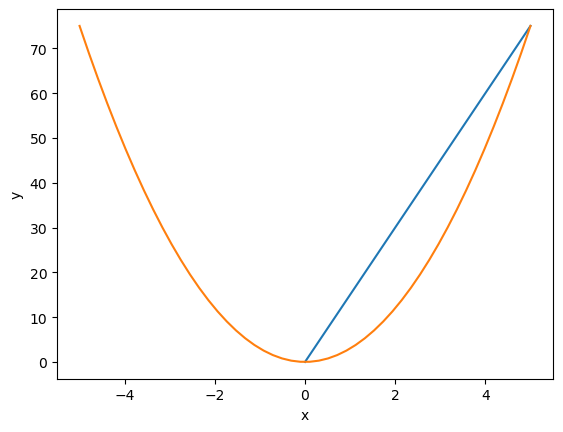

In [18]:
sns.lineplot(data=data, x='x', y='y')
sns.lineplot(data=data_2, x='x', y='f')
plt.show()

### Функция двух переменных

In [95]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
del y
del x
del f
del res
del lam

In [20]:
f, y, x, lam = symbols('f y x lam')

In [21]:
f = 3 * x ** 2 + 5 * y ** 2
df_x = diff(f, x)
df_y = diff(f, y)

In [31]:
x_0 = 0
y_0 = 0
res = {'x': [], 'y': [], 'f': []}
x_1 = 5
y_1 = 10
m = ((x_0 - x_1) ** 2 + (y_0 - y_1) ** 2) ** 0.5

In [32]:
while m > 0.00000001:
    m = ((x_0 - x_1) ** 2 + (y_0 - y_1) ** 2) ** 0.5
    x_0 = x_1
    y_0 = y_1
    res['x'].append(x_0)
    res['y'].append(y_0)
    res['f'].append(f.subs(x, x_0).subs(y, y_0))
    ff = f.subs(x, x_0 - lam * df_x.subs(x, x_0)).subs(y, y_0 - lam * df_y.subs(y, y_0))
    d = diff(ff, lam)
    sol = np.array(solve(d))
    lam_1 = sol[0]
    x_1 = x_0 - lam_1 * df_x.subs(x, x_0)
    y_1 = y_0 - lam_1 * df_y.subs(y, y_0)

In [33]:
res

{'x': [5,
  1000/527,
  1200/12121,
  240000/6387767,
  288000/146918641,
  57600000/77426123807,
  69120000/1780800847561,
  13824000000/938482046664647,
  16588800000/21585087073286881,
  3317760000000/11375340887622186287,
  3981312000000/261632840415310284601,
  796262400000000/137880506898868519984727,
  955514880000000/3171251658673975959648721],
 'y': [10,
  -180/527,
  2400/12121,
  -43200/6387767,
  576000/146918641,
  -10368000/77426123807,
  138240000/1780800847561,
  -2488320000/938482046664647,
  33177600000/21585087073286881,
  -597196800000/11375340887622186287,
  7962624000000/261632840415310284601,
  -143327232000000/137880506898868519984727,
  1911029760000000/3171251658673975959648721],
 'f': [575,
  6000/527,
  1440000/6387767,
  345600000/77426123807,
  82944000000/938482046664647,
  19906560000000/11375340887622186287,
  4777574400000000/137880506898868519984727,
  1146617856000000000/1671249624121185330734875967,
  275188285440000000000/20257216693972887393837431